In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
vc xz

In [ ]:

import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor

In [ ]:
df_train = pd.read_csv('/kaggle/input/stanford-car-dataset-by-classes-folder/anno_train.csv', header=None)
df_test = pd.read_csv('/kaggle/input/stanford-car-dataset-by-classes-folder/anno_test.csv', header=None)

df_train.columns = ['fname', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'car_class']
df_test.columns = ['fname', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'car_class']


In [ ]:
Train_imgs_dataset = "/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train"
Cropped_train_imgs = "/kaggle/working/CR_train"
# train_classes = os.listdir(Train_imgs_dataset)


Test_imgs_dataset = "/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/test"
Cropped_test_imgs = "/kaggle/working/CR_test"
# test_classes = os.listdir(Test_imgs_dataset)

In [ ]:
# train_classes[:10], test_classes[:10]

In [ ]:
# len(train_classes), len(test_classes)

In [ ]:
# train_classes == test_classes

In [ ]:
import os
from PIL import Image
import pandas as pd


# Create dictionaries for quick lookup
annotations_train_dict = df_train.set_index('fname').to_dict(orient='index')
annotations_test_dict = df_test.set_index('fname').to_dict(orient='index')

# Ensure the output directories exist
os.makedirs(Cropped_train_imgs, exist_ok=True)
os.makedirs(Cropped_test_imgs, exist_ok=True)

# Function to crop and save the image based on the bounding box coordinates
def crop_and_save_image(img_name, class_folder, base_path, output_dir, annotations_dict):
    # Construct the full image path including the class subdirectory
    img_path = os.path.join(base_path, class_folder, img_name)

    # Check if the file exists before attempting to open it
    if not os.path.isfile(img_path):
        print(f"File not found: {img_path}")
        return

    # Retrieve the annotation
    if img_name not in annotations_dict:
        print(f"No annotation for image: {img_name}")
        return

    bbox = annotations_dict[img_name]
    bbox_coords = (bbox['bbox_x1'], bbox['bbox_y1'], bbox['bbox_x2'], bbox['bbox_y2'])

    # Open the image
    with Image.open(img_path) as img:
        # Crop the image using the bounding box coordinates
        cropped_img = img.crop(bbox_coords)

        # Create the output subfolder path
        output_subfolder = os.path.join(output_dir, class_folder)

        # Ensure the output subfolder exists
        os.makedirs(output_subfolder, exist_ok=True)

        # Construct the full output path including the subfolder
        img_output = os.path.join(output_subfolder, img_name)

        # Save the cropped image
        cropped_img.save(img_output)

# Process training images
for class_folder in os.listdir(Train_imgs_dataset):
    class_folder_path = os.path.join(Train_imgs_dataset, class_folder)
    if os.path.isdir(class_folder_path):
        for img_name in os.listdir(class_folder_path):
            crop_and_save_image(img_name, class_folder, Train_imgs_dataset, Cropped_train_imgs, annotations_train_dict)

# Process test images
for class_folder in os.listdir(Test_imgs_dataset):
    class_folder_path = os.path.join(Test_imgs_dataset, class_folder)
    if os.path.isdir(class_folder_path):
        for img_name in os.listdir(class_folder_path):
            crop_and_save_image(img_name, class_folder, Test_imgs_dataset, Cropped_test_imgs, annotations_test_dict)


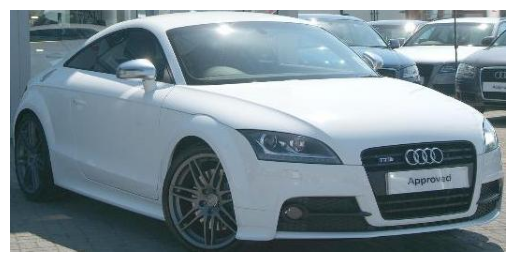

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path
image_path = '/kaggle/working/CR_train/Audi TTS Coupe 2012/00001.jpg'

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
train_classes = os.listdir(Cropped_train_imgs)
test_classes = os.listdir(Cropped_test_imgs)

In [ ]:
len(train_classes), len(test_classes)

(196, 196)

In [ ]:
train_dataset = ImageFolder(Cropped_train_imgs, transform = ToTensor())
test_dataset = ImageFolder(Cropped_test_imgs, transform = ToTensor())

In [ ]:
len(train_dataset), len(test_dataset)

(8144, 8041)

In [ ]:
image, label = train_dataset[0]
print('image_shape:', image.shape, 'Label:',label)

image_shape: torch.Size([3, 344, 615]) Label: 0


In [ ]:
image, label = train_dataset[1]
print('image_shape:', image.shape, 'Label:',label)

image_shape: torch.Size([3, 50, 78]) Label: 0


In [ ]:
def show_example(img, label):
    print('Label: ', train_dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Acura Integra Type R 2001 (1)


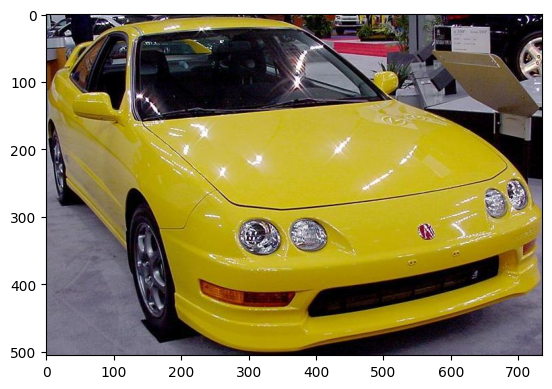

In [ ]:
show_example(*test_dataset[50])

In [ ]:
random_seed = 42
torch.manual_seed(random_seed);

In [ ]:
val_percent = 0.05
val_size = int(val_percent * len(train_dataset))
train_size = len(train_dataset) - val_size

train_ds, val_ds = random_split(train_dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(7737, 407)

In [ ]:
batch_size = 128

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

detailed_mean = [0.2, 0.2, 0.2]
detailed_std = [0.5, 0.5, 0.5]

transform = transforms.Compose([tt.Resize((256, 256)),
                        tt.RandomRotation(0),
                        tt.ToTensor(),
                        tt.Normalize(detailed_mean, detailed_std,inplace = True)])


dTrain = ImageFolder(Cropped_train_imgs, transform = transform)
dTest = ImageFolder(Cropped_test_imgs, transform = transform)

train_loader = DataLoader(dTrain, batch_size, shuffle=True,num_workers=4)
test_loader = DataLoader(dTest, batch_size, shuffle=False,num_workers=4)

In [ ]:
def get_indices_by_label(dataset, label_name):
    """
    Get indices of images in the dataset that match the given label name.

    Parameters:
        dataset (ImageFolder): The ImageFolder dataset instance.
        label_name (str): The name of the label to filter images.

    Returns:
        List[int]: List of indices of images with the specified label.
    """
    # Get the label index for the given label name
    if label_name not in dataset.classes:
        raise ValueError(f"Label '{label_name}' not found in dataset classes.")

    label_idx = dataset.classes.index(label_name)

    # Collect indices of images with the specified label
    indices = []
    for idx, (img_path, label) in enumerate(dataset.samples):
        if label == label_idx:
            indices.append(idx)

    if not indices:
        print(f"No images found for label '{label_name}'.")
    else:
        print(f"Indices of images with label '{label_name}': {indices}")

    return indices

# Example usage
label_name = "Audi TTS Coupe 2012"
indices = get_indices_by_label(dTrain, label_name)


Indices of images with label 'Audi TTS Coupe 2012': [946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988]


Label:  Audi TTS Coupe 2012 (23)


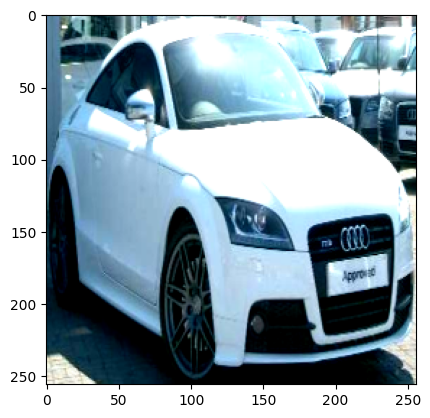

In [ ]:
show_example(*dTrain[946]);


In [ ]:
def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize = (12,6))
    ax.set_xticks([]), ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1,2,0))
    break

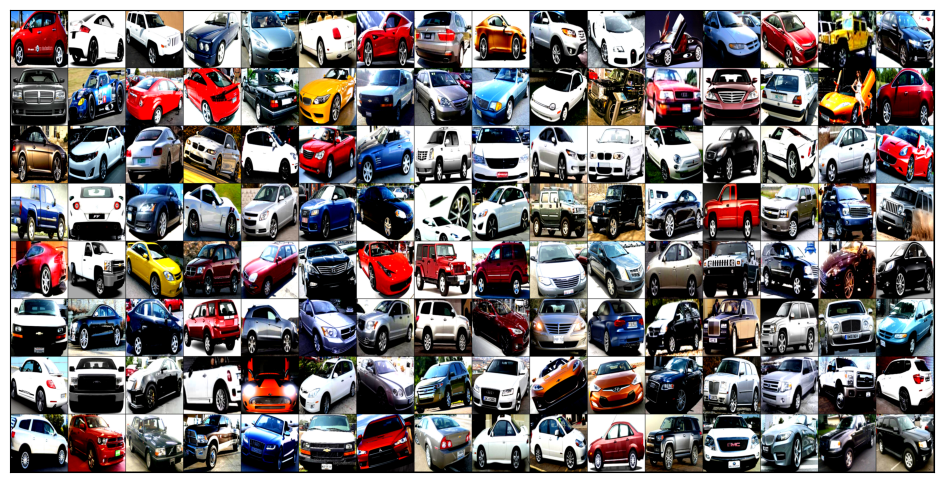

In [ ]:
show_batch(train_loader);

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
valid_dl = DeviceDataLoader(test_loader, device)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
from torchvision import models

class StanfordCarsModel(ImageClassificationBase):
    def __init__(self, num_classes, pretrained=True):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet34(pretrained=pretrained)
        # Replace last layer
        self.network.fc = nn.Linear(self.network.fc.in_features, num_classes)

    def forward(self, xb):
        return self.network(xb)

In [ ]:
import torch
from tqdm.notebook import tqdm

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                                steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = StanfordCarsModel(len(train_dataset.classes))
to_device(model, device);

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 203MB/s]


In [ ]:
model

StanfordCarsModel(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

In [ ]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 5.51074743270874, 'val_acc': 0.004588293842971325}]

In [ ]:
epochs = 12
max_lr = 0.0001
grad_clip = 0.1
weight_decay = 1e-4

opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl,
                         grad_clip=grad_clip,
                         weight_decay=weight_decay,
                         opt_func=opt_func)

  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [0], last_lr: 0.00002, train_loss: 5.4110, val_loss: 5.2536, val_acc: 0.0146


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [1], last_lr: 0.00006, train_loss: 4.8140, val_loss: 4.4033, val_acc: 0.1853


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [2], last_lr: 0.00009, train_loss: 3.6138, val_loss: 3.1257, val_acc: 0.4881


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [3], last_lr: 0.00010, train_loss: 2.1538, val_loss: 2.0891, val_acc: 0.7144


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [4], last_lr: 0.00009, train_loss: 0.9845, val_loss: 1.5224, val_acc: 0.7916


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [5], last_lr: 0.00008, train_loss: 0.3825, val_loss: 1.2657, val_acc: 0.8251


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [6], last_lr: 0.00006, train_loss: 0.1685, val_loss: 1.1404, val_acc: 0.8386


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [7], last_lr: 0.00005, train_loss: 0.1015, val_loss: 1.0974, val_acc: 0.8418


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [8], last_lr: 0.00003, train_loss: 0.0771, val_loss: 1.0705, val_acc: 0.8438


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [9], last_lr: 0.00001, train_loss: 0.0650, val_loss: 1.0633, val_acc: 0.8444


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [10], last_lr: 0.00000, train_loss: 0.0597, val_loss: 1.0589, val_acc: 0.8449


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [11], last_lr: 0.00000, train_loss: 0.0581, val_loss: 1.0596, val_acc: 0.8459
CPU times: user 6min 6s, sys: 45.8 s, total: 6min 51s
Wall time: 9min 16s
